# **Project:- Pizza Price Predction**

**Problem Statement:- We have to predict the price of the pizza using Machine Learning.**

# **Imort the Essential Libraries**

In [1]:
# Import ing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Step:-1(Data Collection)**

In [2]:
# load the dataset form our local drive 
df = pd.read_csv("pizza_v1.csv")

# **Step:-2(Data Exploration)**

In [3]:
# Display top 5 recors of our data set
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes
1,A,"Rp198,000",20.0,papperoni,double_signature,jumbo,yes,yes
2,A,"Rp120,000",16.0,mushrooms,double_signature,reguler,yes,yes
3,A,"Rp155,000",14.0,smoked beef,double_signature,reguler,yes,no
4,A,"Rp248,000",18.0,mozzarella,double_signature,jumbo,yes,no


In [4]:
# Display last 5 records
df.tail()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
124,E,"Rp39,000",8.5,tuna,spicy tuna,small,yes,yes
125,E,"Rp72,000",12.0,tuna,spicy tuna,medium,yes,yes
126,E,"Rp99,000",14.0,tuna,spicy tuna,large,yes,yes
127,E,"Rp44,000",8.5,meat,BBQ_meat_fiesta,small,yes,no
128,E,"Rp78,000",12.0,meat,BBQ_meat_fiesta,medium,no,no


In [5]:
# Find the shape of our data set
df.shape

(129, 8)

In [6]:
# Print the number of rows and number columns in proper format
print("The number of rows:",df.shape[0])
print("The number of columns:",df.shape[1])

The number of rows: 129
The number of columns: 8


In [7]:
# See the infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price_rupiah  129 non-null    object 
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), object(7)
memory usage: 8.2+ KB


# **Step:-3(Data Cleaning)**

In [8]:
# Check the missing values in data set
df.isnull().sum()

company         0
price_rupiah    0
diameter        0
topping         0
variant         0
size            0
extra_sauce     0
extra_cheese    0
dtype: int64

In [9]:
# Get the overall statiseics(description)
df.describe()

,diameter
count,129.000000
mean,12.976744
std,3.272674
min,8.000000
25%,12.000000
50%,12.000000
75%,14.000000
max,22.000000


# **Step:-4(Data Preprocessing)**

In [11]:
#
df.head(1)

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,"Rp235,000",22.0,chicken,double_signature,jumbo,yes,yes


In [12]:
# Rename the price_rupiah
df.rename({'price_rupiah':'price'},axis=1,inplace=True)

In [13]:
#Remove Rp and comma for price coumn
df['price']= df['price'].str.replace('Rp','')
df['price'] = df['price'].str.replace(',','')

In [14]:
# Change the data type
df['price'] = df['price'].astype('int')

In [15]:
# check the top five records
df.head(1)

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes


In [16]:
# Check the infomaton
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       129 non-null    object 
 1   price         129 non-null    int32  
 2   diameter      129 non-null    float64
 3   topping       129 non-null    object 
 4   variant       129 non-null    object 
 5   size          129 non-null    object 
 6   extra_sauce   129 non-null    object 
 7   extra_cheese  129 non-null    object 
dtypes: float64(1), int32(1), object(6)
memory usage: 7.7+ KB


In [17]:
# convert rupiah into INR
def convert(value):
    return value*0.0054
df['price'] = df['price'].apply(convert)

In [18]:
df.head(1)

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes


# **Step:5(Data Analysis)**

# **First Univariate Data Analysis**

In [22]:
# Extract the columns
df.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese'],
      dtype='object')

In [23]:
# For the company column
# Counts the exact values
df['company'].value_counts()

C    30
E    30
A    25
B    24
D    20
Name: company, dtype: int64

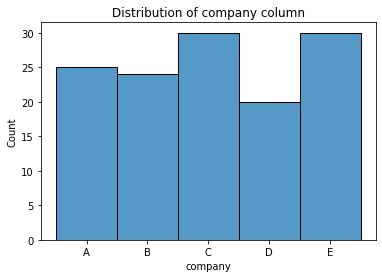

In [25]:
# Better practices to visualize
sns.histplot(x='company',data=df)
plt.title("Distribution of company column")
plt.show()

In [27]:
# For the price column
# count the exact value present in price
df['price'].value_counts().head()

388.8    11
486.0     8
248.4     7
518.4     5
448.2     5
Name: price, dtype: int64

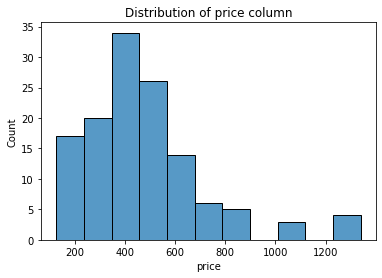

In [28]:
# See the visualization
sns.histplot(x='price',data=df)
plt.title("Distribution of price column")
plt.show()

In [30]:
# For the diameter columns
# counts the exact number of values
df['diameter'].value_counts().head()

12.0    49
14.0    24
8.5     22
17.0    10
18.5     6
Name: diameter, dtype: int64

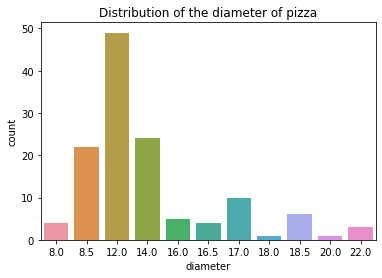

In [32]:
# See the visualization by using count plot
sns.countplot(x='diameter',data=df)
plt.title("Distribution of the diameter of pizza")
plt.show()

In [33]:
# for topping column
df['topping'].value_counts().head()

chicken        29
mushrooms      22
mozzarella     21
smoked beef    19
tuna            9
Name: topping, dtype: int64

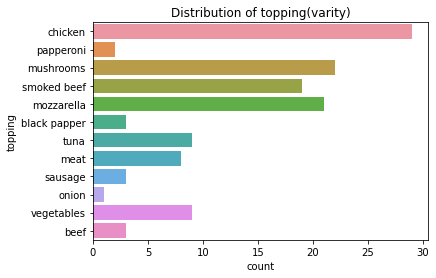

In [36]:
# See the visualization
sns.countplot(y='topping',data=df)
plt.title("Distribution of topping(varity)")
plt.show()

In [37]:
# For variant
df['variant'].value_counts().head(2)

classic        30
meat_lovers    10
Name: variant, dtype: int64

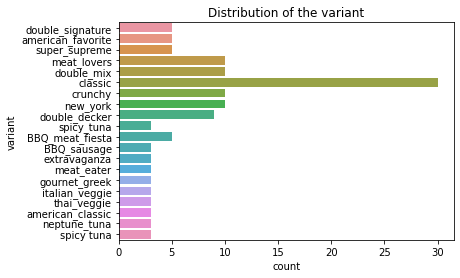

In [38]:
# See the visualization
sns.countplot(y = 'variant',data=df)
plt.title("Distribution of the variant")
plt.show()

In [40]:
# For the size column
df['size'].value_counts().head(2)

medium    41
small     22
Name: size, dtype: int64

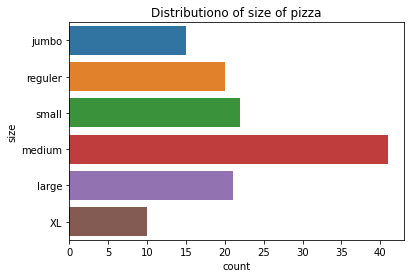

In [41]:
# See the visualization
sns.countplot(y = 'size',data=df)
plt.title("Distributiono of size of pizza")
plt.show()

In [42]:
# For extra sauce
df['extra_sauce'].value_counts().head(2)

yes    76
no     53
Name: extra_sauce, dtype: int64

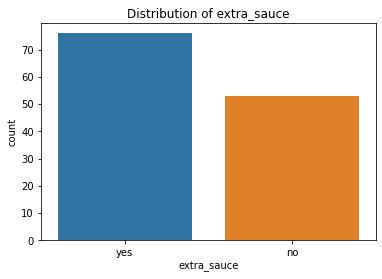

In [43]:
# see the visualization
sns.countplot(x='extra_sauce',data=df)
plt.title("Distribution of extra_sauce")
plt.show()

In [44]:
# For extra_cheese
df['extra_cheese'].value_counts().head()

yes    86
no     43
Name: extra_cheese, dtype: int64

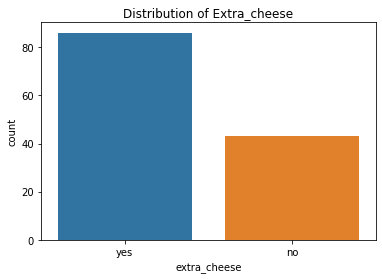

In [45]:
# See the vsualization
sns.countplot(x='extra_cheese',data=df)
plt.title("Distribution of Extra_cheese")
plt.show()

# **Bivariate Data Analysis**

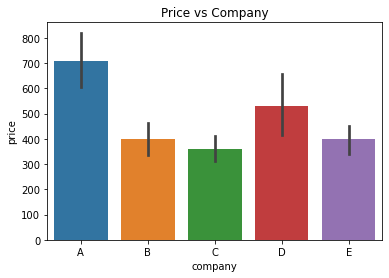

In [46]:
# Price by company
sns.barplot(x='company',y='price',data=df)
plt.title("Price vs Company")
plt.show()

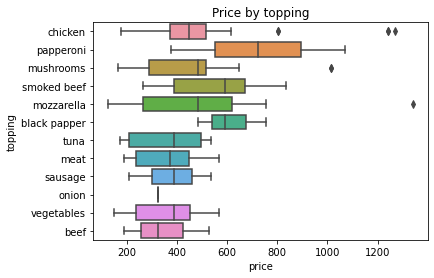

In [47]:
# Price by topping
sns.boxplot(x='price',y='topping',data=df)
plt.title("Price by topping")
plt.show()

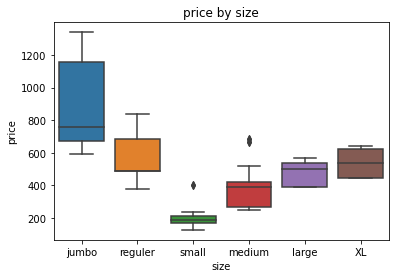

In [48]:
# Price by size
sns.boxplot(x='size',y='price',data=df)
plt.title("price by size")
plt.show()

In [49]:
# Find the most expensive pizza
df[df['price'].max()==df['price']]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no


In [51]:
# Find the diameter of jumbo size pizza
df[df['size']=='jumbo']['diameter'].head()

0    22.0
1    20.0
4    18.0
5    18.5
6    16.0
Name: diameter, dtype: float64

In [52]:
# Find the diameter of XL size pizza
df[df['size']=='XL']['diameter'].head()

29    17.0
35    17.0
41    17.0
47    17.0
93    17.0
Name: diameter, dtype: float64

Here, 16 size jumbo pizza is outliers.so we have to remove it

In [53]:
# Lets remove the outliers
# fist see the index of outliers
df[(df['size']=='jumbo')&(df['diameter']<=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
6,A,594.0,16.0,smoked beef,american_favorite,jumbo,no,yes
11,A,594.0,16.0,black papper,super_supreme,jumbo,yes,yes
16,A,594.0,16.0,smoked beef,meat_lovers,jumbo,no,yes
80,D,594.0,16.0,smoked beef,meat_lovers,jumbo,no,yes


In [54]:
# Lets remove outliers
df = df.drop(df.index[[6,11,16,80]])

In [55]:
#checking the outliers
df[(df['size']=='jumbo')&(df['diameter']<=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese


In [56]:
# Save our clean data set
df.to_csv("Cleaned_pizza_data.csv")

In [57]:
# Label encoding
# Extract the columnts that are object data type
df.select_dtypes(include=['object']).columns

Index(['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese'], dtype='object')

In [58]:
# see the data frame
df.head(2)

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes
1,A,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes


In [59]:
# Apply the label encoder
# Load the class
from sklearn.preprocessing import LabelEncoder

In [60]:
cat_cols = df.select_dtypes(include=['object']).columns
en = LabelEncoder()
for i in cat_cols:
    df[i] = en.fit_transform(df[i])

In [61]:
# check the head
df.head(2)

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese
0,0,1269.0,22.0,2,8,1,1,1
1,0,1069.2,20.0,7,8,1,1,1


# **Step:6(Modeling)**

In [62]:
# Store the featue matrix in X and response vector in y
X = df.drop(['price'],axis=1)
y = df['price']

In [63]:
# Train test split
# load the class
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [67]:
# Import the model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from xgboost import XGBRegressor

In [68]:
# Model training
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)


GradientBoostingRegressor()

In [70]:
# Prediction on test data
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

In [71]:
# Evaluatin of the algorithm
# Check the r square error
from sklearn import metrics as m

In [72]:
s1 = m.r2_score(y_test,y_pred1)
s2 = m.r2_score(y_test,y_pred2)
s3 = m.r2_score(y_test,y_pred3)
s4 = m.r2_score(y_test,y_pred4)
print("R Square for Linear Regression model is:",s1)
print("R square error or SVM is:",s2)
print("R square erro of RF is",s3)
print("R square erro of GR is",s4)

R Square for Linear Regression model is: 0.6756011219804258
R square error or SVM is: 0.03334185900106057
R square erro of RF is 0.9120480503938375
R square erro of GR is 0.9061817494970654


In [73]:
# Visualizatio by using data frame
df1 = pd.DataFrame({'Models':['LR','SVR','RF','GR'],'R2_Score':[s1,s2,s3,s4]})
df1

,Models,R2_Score
0,LR,0.675601
1,SVR,0.033342
2,RF,0.912048
3,GR,0.906182


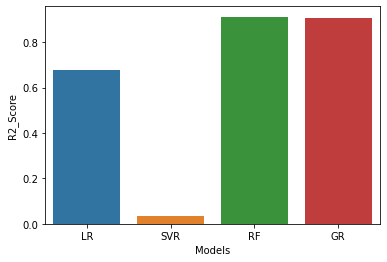

In [76]:
# Barplot
sns.barplot(x='Models',y='R2_Score',data=df1)
plt.show()

# **Feature Importances**

In [77]:
# For random forest
rf.feature_importances_

array([0.00882039, 0.58983451, 0.03936239, 0.1100092 , 0.19922791,
       0.04034834, 0.01239726])

In [79]:
# Visualize
pds1 = pd.Series(rf.feature_importances_,index = X_train.columns)

<AxesSubplot:>

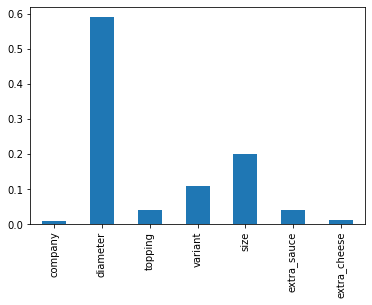

In [80]:
# Plot
pds1.plot(kind='bar')

In [81]:
# Similarly for other ml model

In [82]:
# Train the model for entire data set
# Store the featue matrix in X and response vector in y
X = df.drop(['price'],axis=1)
y = df['price']

In [83]:
rf = RandomForestRegressor()

In [84]:
rf.fit(X,y)

RandomForestRegressor()

In [85]:
# Save our model
import joblib

In [86]:
joblib.dump(rf,'pizza_price_prediction.pkl')

['pizza_price_prediction.pkl']

In [88]:
# Test our model
# create a new data
df2 = pd.DataFrame({
    'company':1,
    'diameter':22.3,
    'topping':2,
    'variant':3,
    'size':1,
    'extra_sauce':1,
    'extra_cheese':0
},index=[0])
df2

,company,diameter,topping,variant,size,extra_sauce,extra_cheese
0,1,22.3,2,3,1,1,0


In [90]:
# load our model
model = joblib.load(open('pizza_price_prediction.pkl','rb'))

In [91]:
# lets predict
model.predict(df2)

array([1225.098])

# **Make a GUI**

In [93]:
# laad the tkinter library
#from tkinter import *
#master = Tk()
#master.title("Piaaz")
#label = Label(master,text='Pizza Price Prediction Page',bg='green',fg='white').grid(row=0,columnspan=2)
#Label(master,text ="Enter company value")
#master.mainloop()